In [130]:
#imorting the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from IPython.display import display
from PIL import Image

import numpy as np


import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.metrics import classification_report, confusion_matrix

In [131]:
#Initialize the CNN
classifier = Sequential()

In [132]:
#Step 1 - Convolution
classifier.add(Conv2D(32, 
                      (3, 3), 
                      input_shape = (128, 128, 3)))
               
classifier.add(LeakyReLU(alpha=0.1))

In [133]:
#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [134]:
#step 3 - Flattening
classifier.add(Flatten())

In [135]:
#step 4 - Full Connection
classifier.add(Dense(units = 128))

classifier.add(LeakyReLU(alpha=0.1))

classifier.add(Dense(units = 26, 
                     activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

In [136]:
#Fitting the CNN to the images
train_datagen = ImageDataGenerator(
        shear_range = 0.2,
        zoom_range = 0.2,
        rescale = 1./255,
        horizontal_flip = False)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

In [137]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New/new_train_set',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New/new_test_set',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

Found 254 images belonging to 26 classes.
Found 77 images belonging to 26 classes.


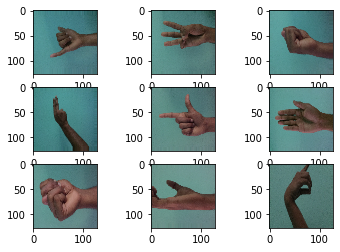

In [138]:
# generate samples and plot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = training_set.next()
    image = batch[0]
    plt.imshow(image[1])

#show the figure
pyplot.show()

In [140]:
#Training the network

history = classifier.fit_generator(
        training_set,
        steps_per_epoch = 500,
        epochs = 10,
        validation_data = test_set,
        validation_steps = 50)

Epoch 1/10
500/500 [==============================] - 1470s 3s/step - loss: 0.3191 - acc: 0.9150 - val_loss: 0.5914 - val_acc: 0.8567
Epoch 2/10
500/500 [==============================] - 1473s 3s/step - loss: 0.0078 - acc: 0.9992 - val_loss: 0.5192 - val_acc: 0.8763
Epoch 3/10
500/500 [==============================] - 1469s 3s/step - loss: 0.0099 - acc: 0.9980 - val_loss: 0.5720 - val_acc: 0.8650
Epoch 4/10
500/500 [==============================] - 1465s 3s/step - loss: 0.0040 - acc: 0.9986 - val_loss: 0.5768 - val_acc: 0.8755
Epoch 5/10
500/500 [==============================] - 1461s 3s/step - loss: 0.0217 - acc: 0.9937 - val_loss: 0.6079 - val_acc: 0.8630
Epoch 6/10
500/500 [==============================] - 1467s 3s/step - loss: 2.4401e-04 - acc: 1.0000 - val_loss: 0.5616 - val_acc: 0.8742
Epoch 7/10
500/500 [==============================] - 1472s 3s/step - loss: 9.4953e-05 - acc: 1.0000 - val_loss: 0.5866 - val_acc: 0.8763
Epoch 8/10
500/500 [==============================] - 

In [117]:
# save model and architecture to single file
classifier.save("model.SSL")
#print("Saved model to disk")

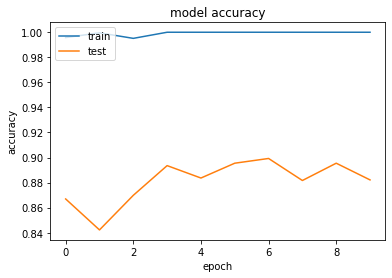

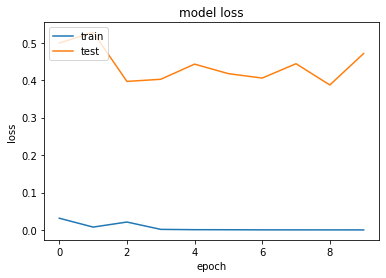

In [94]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
#Confution Matrix and Classification Report
#Y_pred = classifier.predict_generator(test_set, 20 // 32+1)
#y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
#print(confusion_matrix(test_set.classes, y_pred))
#print('Classification Report')
#target_names = ['Cats', 'Dogs', 'Horse']
#print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [3]:
# load and evaluate a saved model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from numpy import loadtxt
from keras.models import load_model
from keras.preprocessing import image

from IPython.display import display
from PIL import Image

import numpy as np
from scipy.misc import imresize

import matplotlib.pyplot as plt
from matplotlib import pyplot

# load model
classifier = load_model('model.SSL')

Using TensorFlow backend.
W0729 23:55:57.120906 30700 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 23:55:57.153565 30700 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 23:55:57.172801 30700 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0729 23:55:57.303654 30700 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_defaul

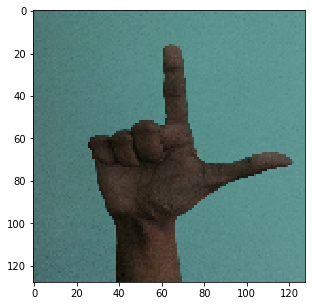

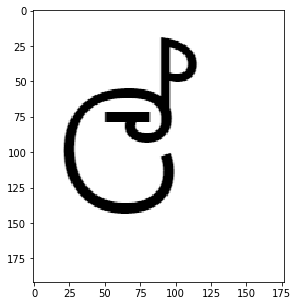

In [14]:
test_image = load_img('C:/Users/ASUS/Desktop/Research/Image Dataset/random/IMG_5857.jpg', 
                      target_size = (128, 128))

#test_image = test_image.rotate(-90)
#plt.imshow(test_image)

display_image = test_image.rotate(-90)
#plt.imshow(display_image)

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict_classes(test_image)

#print(result)

if result == 0:
    prediction = 'Sign 1'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter a.png')
elif result == 1:
    prediction = 'Sign 10'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter K.png')
elif result == 2:
    prediction = 'Sign 11'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter G.png')
elif result == 3:
    prediction = 'Sign 12'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter T.png')
elif result == 4:
    prediction = 'Sign 13'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter dh.png')
elif result == 5:
    prediction = 'Sign 14'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter th.png')
elif result == 6:
    prediction = 'Sign 15'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter D.png')
elif result == 7:
    prediction = 'Sign 16'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter N.png')
elif result == 8:
    prediction = 'Sign 17'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter P.png')
elif result == 9:
    prediction = 'Sign 18'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter B.png')
elif result == 10:
    prediction = 'Sign 19'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter M.png')
elif result == 11:
    prediction = 'Sign 2'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter aa.png')
elif result == 12:
    prediction = 'Sign 20'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter Y.png')
elif result == 13:
    prediction = 'Sign 21'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter R.png')
elif result == 14:
    prediction = 'Sign 22'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter L.png')
elif result == 15:
    prediction = 'Sign 23'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter V.png')
elif result == 16:
    prediction = 'Sign 24'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter S.png')
elif result == 17:
    prediction = 'Sign 25'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter H.png')
elif result == 18:
    prediction = 'Sign 26'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ch.png')
elif result == 19:
    prediction = 'Sign 3'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ae.png')
elif result == 20:
    prediction = 'Sign 4'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter i.png')
elif result == 21:
    prediction = 'Sign 5'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ii.png')
elif result == 22:
    prediction = 'Sign 6'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter u.png')
elif result == 23:
    prediction = 'Sign 7'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter uu.png')
elif result == 24:
    prediction = 'Sign 8'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter e.png')
elif result == 25:
    prediction = 'Sign 9'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ee.png')
    
#print(prediction)

# generate samples and plot
for i in range(2):
    pyplot.subplots(1, figsize=(12, 5))
    
    if i == 0:
        plt.imshow(display_image)
    elif i == 1:
        plt.imshow(Result_Image)
